In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
df = pd.read_excel('preprocessed data.xlsx')

In [54]:
df.head()

,Unnamed: 0,sl.no.,0- Good Outcome/no recurrence\n1- Bad Outcome/recurrence,tumor size,node status of the tumor,Age of the patient,tumor grade,A%-M,AI-M,A%-C,...,R%-C,U%-C,V%-C,W%-M,W%-C,ZA1%-M,ZA1%-C,ZB%-C,ZC%-C,ZD%-C
0,0,1,0,2,1,60,3,0,2.5,70,...,70,80,75,70,60,85,60,80,85,70
1,1,2,0,1,1,55,2,15,2.0,20,...,75,80,75,80,60,85,60,80,80,80
2,2,3,0,1,1,33,3,0,2.5,70,...,60,75,70,70,70,55,70,75,80,75
3,3,4,0,1,1,67,2,0,2.0,45,...,70,75,60,45,70,60,70,75,80,80
4,4,5,0,1,1,47,2,0,0.0,0,...,75,75,80,70,75,85,75,80,80,80


In [55]:
df.columns

Index(['Unnamed: 0', 'sl.no.',
       '0- Good Outcome/no recurrence\n1- Bad Outcome/recurrence',
       'tumor size', 'node status of the tumor', 'Age of the patient',
       'tumor grade', 'A%-M', 'AI-M', 'A%-C', 'AI-C', 'A%-N', 'CI-M', 'C%-C',
       'CI-C', 'C%-N', 'CI-N', 'F%-M', 'FI-M', 'F%-C', 'FI-C', 'K%-M', 'KI-M',
       'K%-C', 'KI-C', 'KI-N', 'M%-M', 'MI-M', 'MI-C', 'M%-N', 'MI-N', 'O%-M',
       'OI-M', 'OI-C', 'O%-N', 'OI-N', 'P%-N', 'PI-N', 'R%-M', 'RI-M', 'RI-C',
       'U%-M', 'UI-M', 'UI-C', 'U%-N', 'UI-N', 'V%-M', 'VI-M', 'VI-C', 'WI-M',
       'WI-C', 'ZA1I-M', 'ZA1I-C', 'ZB%-M', 'ZBI-M', 'ZBI-C', 'ZB%-N', 'ZBI-N',
       'ZC%-M', 'ZCI-M', 'ZCI-C', 'ZC%-N', 'ZCI-N', ' ZD%-M', 'ZDI-M', 'ZDI-C',
       'ZD%-N', 'ZDI-N', 'ZF2%-C', 'ZF2I-C', 'ZF2%-N', 'ZF2I-N', 'AI-N',
       'C%-M', 'K%-N', 'M%-C', 'O%-C', 'R%-C', 'U%-C', 'V%-C', 'W%-M', 'W%-C',
       'ZA1%-M', 'ZA1%-C', 'ZB%-C', 'ZC%-C', 'ZD%-C'],
      dtype='object')

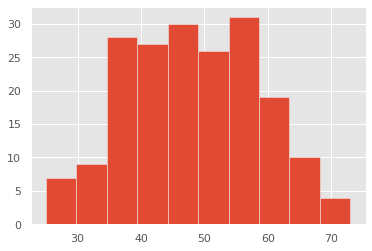

In [56]:
plt.style.use('ggplot')
df[df['0- Good Outcome/no recurrence\n1- Bad Outcome/recurrence']==0]['Age of the patient'].hist()

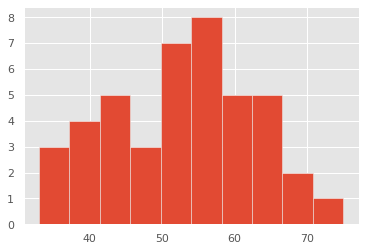

In [57]:
plt.style.use('ggplot')
df[df['0- Good Outcome/no recurrence\n1- Bad Outcome/recurrence']==1]['Age of the patient'].hist()

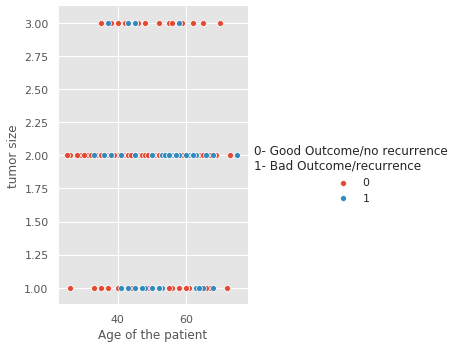

In [58]:
sns.pairplot(df, x_vars=["Age of the patient"], y_vars=["tumor size"],
             hue='0- Good Outcome/no recurrence\n1- Bad Outcome/recurrence', height=5, aspect=.8);

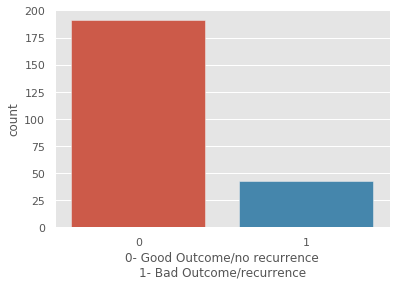

In [59]:
sns.countplot(x='0- Good Outcome/no recurrence\n1- Bad Outcome/recurrence',data=df)

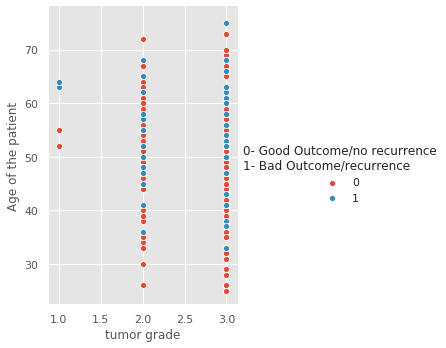

In [60]:
sns.pairplot(df, y_vars=["Age of the patient"], x_vars=['tumor grade'],
             hue='0- Good Outcome/no recurrence\n1- Bad Outcome/recurrence', height=5, aspect=.8);

/home/shanur/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/shanur/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'frequency')

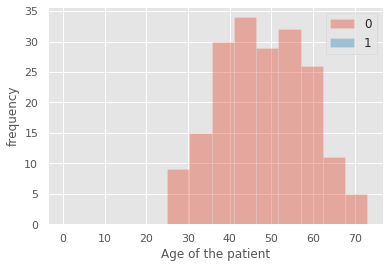

In [61]:
df = df[df['0- Good Outcome/no recurrence\n1- Bad Outcome/recurrence'] == 0]
sns.distplot(df["Age of the patient"],  kde=False, label='0')
df = df[df['0- Good Outcome/no recurrence\n1- Bad Outcome/recurrence'] == 1]
sns.distplot(df["Age of the patient"],  kde=False,label='1')
# Plot formatting
plt.legend(prop={'size': 12})
plt.xlabel("Age of the patient")
plt.ylabel('frequency')

In [12]:
x= df.drop('0- Good Outcome/no recurrence\n1- Bad Outcome/recurrence',1)

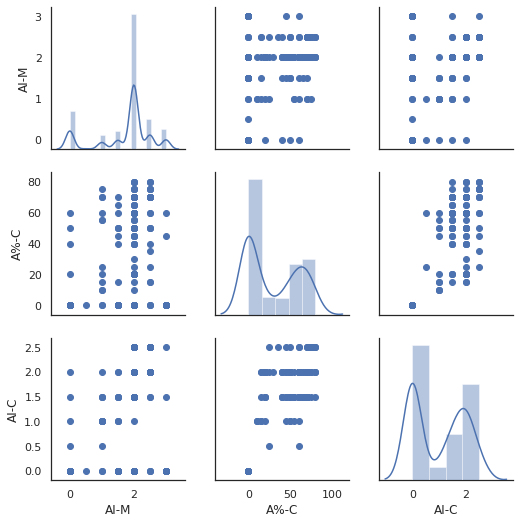

In [21]:
sns.set(style="white")
df = x.loc[:,['AI-M','A%-C','AI-C']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(plt.scatter, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.distplot)